# **Pré-Processamento**

In [2]:
#Pre-Processamento

import pandas as pd

df_1 = pd.read_csv('data/panel_extraction/HIST_PAINEL_COVIDBR_2020_Parte1.csv', sep= ';')
df_2 = pd.read_csv('data/panel_extraction/HIST_PAINEL_COVIDBR_2020_Parte2.csv', sep= ';')
df_3 = pd.read_csv('data/panel_extraction/HIST_PAINEL_COVIDBR_2021_Parte1.csv', sep= ';')
df_4 = pd.read_csv('data/panel_extraction/HIST_PAINEL_COVIDBR_2021_Parte2.csv', sep= ';')

df = pd.concat([df_1, df_2, df_3, df_4])
df = df[df['regiao']=='Brasil']
df = df[['data','obitosNovos']]
df['data'] = pd.to_datetime(df["data"])
df.rename(columns={'obitosNovos':'obitos'}, inplace=True)
df.to_csv('data/covid_br_obitos.csv', sep= ';', index=False)

In [3]:
df.tail()

,data,obitos
125,2021-11-03,164
126,2021-11-04,436
127,2021-11-05,389
128,2021-11-06,328
129,2021-11-07,59


# **Extrair tendência, sazonalidade e resíduo**

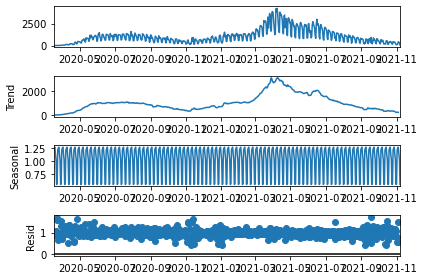

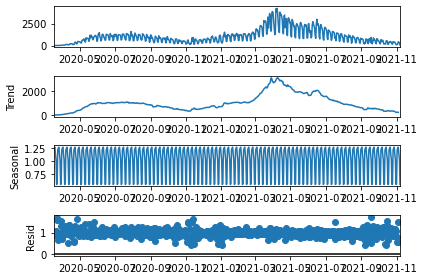

In [4]:
#Extrair tendencia, sazonalidade e residuo 
import pandas as pd
import statsmodels.tsa.api as sm
df = pd.read_csv('data/covid_br_obitos.csv', sep= ';')
df['data'] = pd.to_datetime(df["data"])
df.set_index('data',inplace = True)
df = df[df['obitos']>0]
df = df.asfreq(freq= 'D')
df.head(100)
decompose = sm.seasonal_decompose(df, model= 'multiplicative', period= 7, two_sided= True, extrapolate_trend= 0)
decompose.plot()

# **Teste de Estacionaridade**

## **Série Original**

In [5]:
#Teste de estacionaridade
import pandas as pd
import statsmodels.tsa.api as sm

fuller = sm.adfuller(x= df)
fuller_serie = pd.Series(fuller[0:4], index=['Teste Estatístico Dickey FUller', 'Valor-P', 'Lags', 'Número de Observações'])    #lags auto-correlacao
fuller_serie = round(fuller_serie, 4)
for key, value in fuller[4].items():
    fuller_serie['Valores Críticos (%s)'%key] = value.round(4)
fuller_serie
#Dickey FUller pressupoe que a série é não estacionária
#p-valor se menor que valor criticos a série é estacionária

Teste Estatístico Dickey FUller     -1.9946
Valor-P                              0.2890
Lags                                17.0000
Número de Observações              583.0000
Valores Críticos (1%)               -3.4416
Valores Críticos (5%)               -2.8665
Valores Críticos (10%)              -2.5694
dtype: float64

In [6]:
#Teste KPSS 
import pandas as pd
import statsmodels.tsa.api as sm

kp = sm.kpss(x= df)
kp_serie = pd.Series(kp[0:3], index = ['Teste KPSS', 'P Valor', 'Lags'])    #lags auto-correlacao
kp_serie = round(kp_serie,4)

for key, value in kp[3].items():
    kp_serie['Valores Críticos (%s)'%key] = value

kp_serie

# O teste KPSS assume que a série é estacionária, se o valor p for menor que os valores Criticos a série é não-estacionária


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


Teste KPSS                  0.6477
P Valor                     0.0183
Lags                       19.0000
Valores Críticos (10%)      0.3470
Valores Críticos (5%)       0.4630
Valores Críticos (2.5%)     0.5740
Valores Críticos (1%)       0.7390
dtype: float64

## **Primeira Diferenciação**

<AxesSubplot:xlabel='data'>

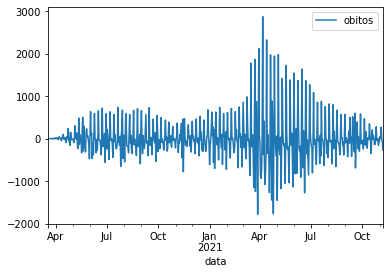

In [7]:
#Primeira Diferenciação
prim_dif = df.diff().dropna()
prim_dif.plot()

In [8]:
#Teste Primeira Diferenciação

#Teste de estacionaridade
import pandas as pd
import statsmodels.tsa.api as sm

fuller_prim = sm.adfuller(x= prim_dif)
fuller_prim_serie = pd.Series(fuller_prim[0:4], index=['Teste Estatístico Dickey FUller', 'Valor-P', 'Lags', 'Número de Observações'])    #lags auto-correlacao
fuller_prim_serie = round(fuller_prim_serie, 4)
for key, value in fuller[4].items():
    fuller_prim_serie['Valores Críticos (%s)'%key] = value.round(4)
fuller_prim_serie
#Dickey FUller pressupoe que a série é não estacionária
#p-valor se menor que valor criticos a série é estacionária


Teste Estatístico Dickey FUller     -4.4515
Valor-P                              0.0002
Lags                                19.0000
Número de Observações              580.0000
Valores Críticos (1%)               -3.4416
Valores Críticos (5%)               -2.8665
Valores Críticos (10%)              -2.5694
dtype: float64

In [9]:
#Teste KPSS 
import pandas as pd
import statsmodels.tsa.api as sm

kp_prim = sm.kpss(x= prim_dif)
kp_prim_serie = pd.Series(kp_prim[0:3], index = ['Teste KPSS', 'P Valor', 'Lags'])    #lags auto-correlacao
kp_prim_serie = round(kp_prim_serie,4)

for key, value in kp[3].items():
    kp_prim_serie['Valores Críticos (%s)'%key] = value

kp_prim_serie

# O teste KPSS assume que a série é estacionária, se o valor p for menor que os valores Criticos a série é não-estacionária


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Teste KPSS                  0.1541
P Valor                     0.1000
Lags                       19.0000
Valores Críticos (10%)      0.3470
Valores Críticos (5%)       0.4630
Valores Críticos (2.5%)     0.5740
Valores Críticos (1%)       0.7390
dtype: float64

# **Autocorrelação e Correlação Parcial**

## **Série Original**

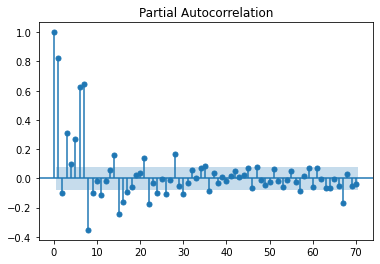

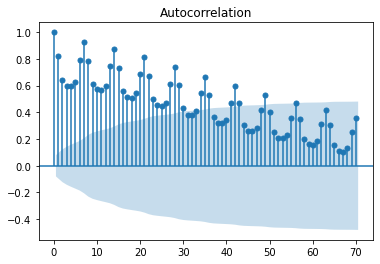

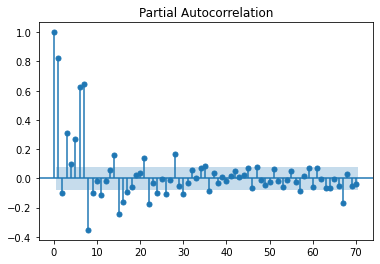

In [10]:
import statsmodels.graphics.tsaplots as sm_graph

sm_graph.plot_acf(df, lags=70)
sm_graph.plot_pacf(df, lags=70)

## **Primeira Diferenciação**

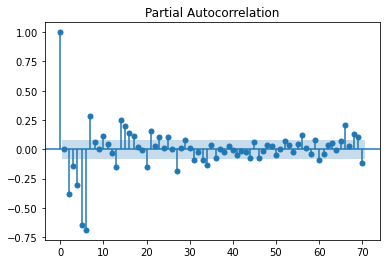

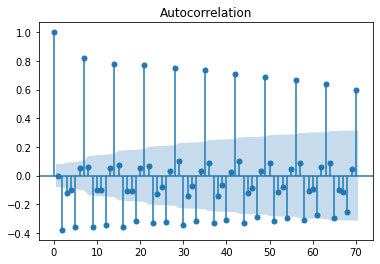

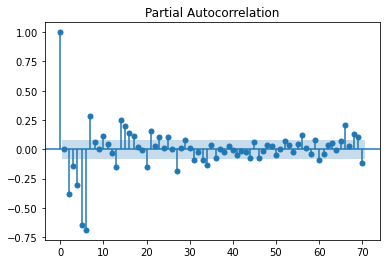

In [11]:
import statsmodels.graphics.tsaplots as sm_graph

sm_graph.plot_acf(prim_dif, lags= 70)
sm_graph.plot_pacf(prim_dif, lags = 70)

# **Modelos**

## **Dividir Treino e Teste**

In [12]:
import pandas as pd

df = pd.read_csv('data/covid_br_obitos.csv', sep= ';')
df['data'] = pd.to_datetime(df["data"])
df.set_index('data',inplace = True)
df = df[df['obitos']>0]
df = df.asfreq(freq= 'D')

df_train, df_test = df.iloc[:-15], df.iloc[-15:]

df_train.head(60)





,obitos
data,
2020-03-17,1
2020-03-18,3
2020-03-19,2
2020-03-20,5
2020-03-21,7
2020-03-22,7
2020-03-23,9
2020-03-24,12
2020-03-25,11


## **Alisamento Exponencial**

### **Simple**

aic: 7180.546787411546
bic: 7189.2934269907


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:>

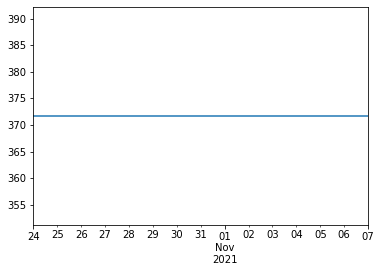

In [35]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
simp_smo = SimpleExpSmoothing(df_train, initialization_method='heuristic')
simp_smo_fit = simp_smo.fit()
simp_smo_forecast = simp_smo_fit.forecast(15)
print('aic:',simp_smo_fit.aic)
print('bic:',simp_smo_fit.bic)
simp_smo_forecast.plot()


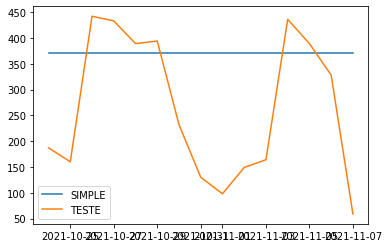

In [14]:
from matplotlib import pyplot as plt

plt.plot(simp_smo_forecast, label= 'SIMPLE')
plt.plot(df_test, label= 'TESTE')

plt.legend()
plt.show()

### **Holt Winters Exponential Smoothing**


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


aic: 6231.366836254481
bic: 6279.4733539398285


<AxesSubplot:>

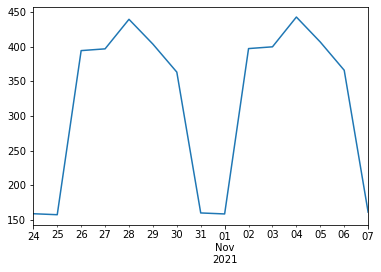

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
exp_smo = ExponentialSmoothing(df_train, trend= 'mul', seasonal= 'mul', seasonal_periods= 7, freq= 'D', use_boxcox=True, initialization_method='heuristic')
exp_smo_fit = exp_smo.fit()
exp_smo_forecast = exp_smo_fit.forecast(15)
print('aic:', exp_smo_fit.aic)
print('bic:', exp_smo_fit.bic)
exp_smo_forecast.plot()

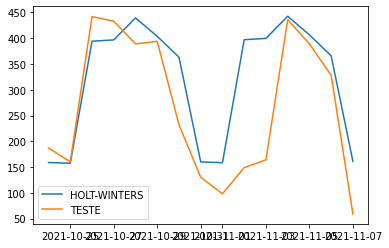

In [34]:
from matplotlib import pyplot as plt

plt.plot(exp_smo_forecast, label= 'HOLT-WINTERS')
plt.plot(df_test, label= 'TESTE')

plt.legend()
plt.show()

### **Linear**

aic: 8038.23430517148
bic: 8090.714142646404


<AxesSubplot:>

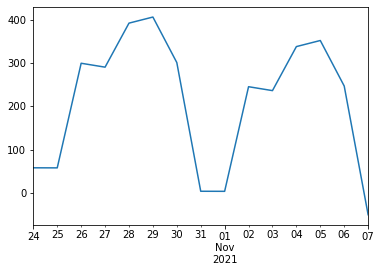

In [18]:
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

linear = ExponentialSmoothing(df_train, trend= True, seasonal=7)
linear_fit = linear.fit()
linear_forecast = linear_fit.forecast(15)
print('aic:',linear_fit.aic)
print('bic:',linear_fit.bic)
linear_forecast.plot()

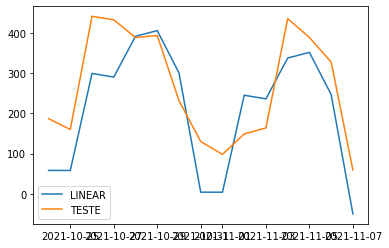

In [19]:
from matplotlib import pyplot as plt

plt.plot(linear_forecast, label= 'LINEAR')
plt.plot(df_test, label= 'TESTE')

plt.legend()
plt.show()

### **Holt**

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


aic: 7305.581049978424
bic: 7323.074329136732


<AxesSubplot:>

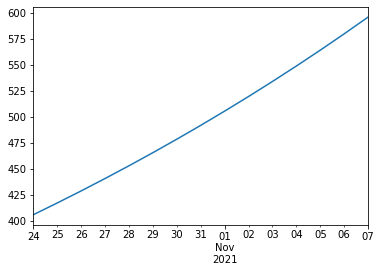

In [20]:
from statsmodels.tsa.holtwinters import Holt

holt = Holt(df_train, exponential = True)
holt_fit = holt.fit()
holt_forecast = holt_fit.forecast(15)
print('aic:',holt_fit.aic)
print('bic:',holt_fit.bic)
holt_forecast.plot()

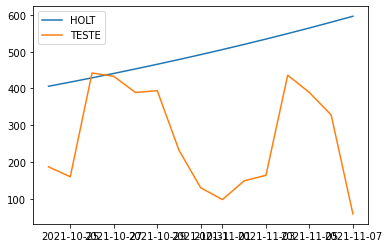

In [21]:
from matplotlib import pyplot as plt

plt.plot(holt_forecast, label= 'HOLT')
plt.plot(df_test, label= 'TESTE')

plt.legend()
plt.show()

### **ARIMA**

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


aic: 8028.9388127704515
bic: 8072.65493124277


<AxesSubplot:>

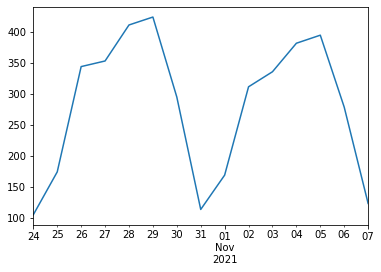

In [22]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(endog = df_train,order = (7,1,2), freq= 'D')
arima_fit = arima.fit()
arima_forecast = arima_fit.forecast(15)
print('aic:',arima_fit.aic)
print('bic:',arima_fit.bic)
arima_forecast.plot()

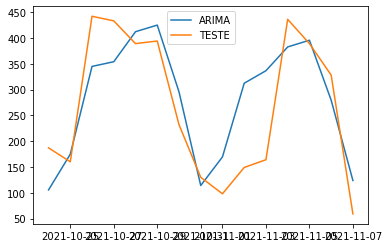

In [23]:
from matplotlib import pyplot as plt

plt.plot(arima_forecast, label= 'ARIMA')
plt.plot(df_test, label= 'TESTE')

plt.legend()
plt.show()

### **SARIMA**

aic: 8028.9388127704515
bic 8072.65493124277


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

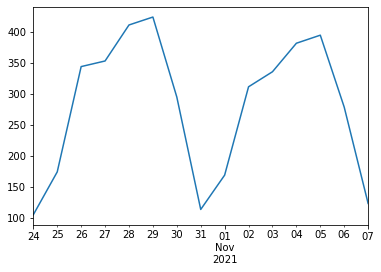

In [24]:
from statsmodels.tsa.arima.model import ARIMA

sarima = ARIMA(endog = df_train, order= (0,0,0), seasonal_order = (7,1,2,7), freq= 'D')
sarima_fit = arima.fit()
sarima_forecast = arima_fit.forecast(15)
print('aic:',sarima_fit.aic)
print('bic',sarima_fit.bic)
sarima_forecast.plot()

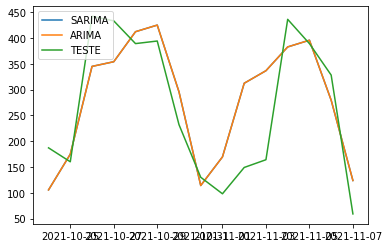

In [25]:
from matplotlib import pyplot as plt

plt.plot(sarima_forecast, label= 'SARIMA')
plt.plot(arima_forecast, label= 'ARIMA')
plt.plot(df_test, label= 'TESTE')

plt.legend()
plt.show()

## **Gráficos**

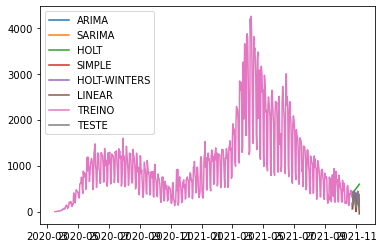

In [26]:
from matplotlib import pyplot as plt

plt.plot(arima_forecast, label= 'ARIMA')
plt.plot(sarima_forecast, label= 'SARIMA')
plt.plot(holt_forecast, label= 'HOLT')
plt.plot(simp_smo_forecast, label= 'SIMPLE')
plt.plot(exp_smo_forecast, label= 'HOLT-WINTERS')
plt.plot(linear_forecast, label= 'LINEAR')
plt.plot(df_train, label= 'TREINO')
plt.plot(df_test, label= 'TESTE')

plt.legend()
plt.show()

## **Cross-Validation**

In [27]:
import pandas as pd
from sktime.forecasting.model_selection import SlidingWindowSplitter
from sktime.forecasting.model_selection import ExpandingWindowSplitter


def cross_validation(dataframe, tipo, window_length, cv):
    colunas = [
        'split',
        'tipo',
        'window',
        'aic',
        'bic',
        'mae',
        'mse'
    ]
    resultados = pd.DataFrame(columns=colunas) 
    cross_valid = cv
    df_cross_validation = cross_valid.split(dataframe.index)
    x = 0
    for train, test in df_cross_validation:
        df_train = df.iloc[train]
        model = ARIMA(endog = df_train, order = (7,1,2), freq= 'D')
        model = model.fit()
        resultados.loc[x] = [x, tipo, window_length, model.aic, model.bic, model.mae, model.mse]
        x = x + 1
    resultados.loc[resultados.index.size] = [
        'media', 
        tipo,
        window_length,
        resultados['aic'].mean(),
        resultados['bic'].mean(),
        resultados['mae'].mean(),
        resultados['mse'].mean()]
    return resultados

def cross_validation_sliding_window(df, window_length):
    return cross_validation(
        df, 
        'sliding',
        window_length,
        SlidingWindowSplitter(
            fh=[1,2,3,4,5,6,7],
            window_length=window_length,
            step_length=window_length
        ),
    )

def cross_validation_expanding_window(df, window_length):
    return cross_validation(
        df, 
        'expanding',
        window_length,
        ExpandingWindowSplitter(
            fh=[1,2,3,4,5,6,7],
            initial_window=window_length,
            step_length=window_length
        )
    )

def cv_window_search_sliding(dataframe, list_window):
    list_df = []
    df = dataframe
    for i in list_window:
        df_resultado_sliding = cross_validation_sliding_window(df, i)
        df_sliding_media = df_resultado_sliding[df_resultado_sliding['split']=='media']
        list_df.append(df_sliding_media)
    return pd.concat(list_df)

def cv_window_search_expanding(dataframe, list_window):
    list_df = []
    df = dataframe
    for i in list_window:
        df_resultado_expanding = cross_validation_expanding_window(df, i)
        df_expanding_media = df_resultado_expanding[df_resultado_expanding['split']=='media']
        list_df.append(df_expanding_media)
    return pd.concat(list_df)
    

In [28]:
import pandas as pd

df = pd.read_csv('data/covid_br_obitos.csv', sep= ';')
df['data'] = pd.to_datetime(df["data"])
df.set_index('data',inplace = True)
df = df[df['obitos']>0]
df = df.asfreq(freq= 'D')

list_window = [20,30,60,90,180,360]

df_resultado_expanding = cv_window_search_sliding(df, list_window)
df_resultado_sliding = cv_window_search_expanding(df, list_window)
df_concat = pd.concat([df_resultado_expanding, df_resultado_sliding])
df_concat.head(100)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sari

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

,split,tipo,window,aic,bic,mae,mse
29,media,sliding,20,265.499436,274.943825,208.433885,171075.616885
19,media,sliding,30,396.508373,410.181332,190.655215,126596.350844
9,media,sliding,60,791.388404,812.163778,168.391539,86203.913904
6,media,sliding,90,1196.558436,1221.444800,160.839163,81335.485371
3,media,sliding,180,2416.440579,2448.314437,153.791610,65505.664986
1,media,sliding,360,4646.093241,4684.926465,108.086172,22514.342535
29,media,expanding,20,3988.372622,4022.832321,105.738004,28455.518144
19,media,expanding,30,3987.593619,4022.248080,106.219758,28642.396833
9,media,expanding,60,3980.197707,4015.312778,107.883861,28481.077418
6,media,expanding,90,4179.847198,4215.765188,110.895604,29051.305050
